# Imports

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [40]:
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# pandas for loading csv
import pandas as pd

# sklearn
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split as tts
from sklearn.ensemble import RandomForestClassifier as RandomForest
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, recall_score, precision_score

# tf
import tensorflow

# Keras
from keras import layers as L
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint

import warnings
warnings.simplefilter(action='ignore', category=UserWarning)

# Data Loading

### Data

For this assignment I chose to use the Breast Cancer Prediction Dataset from Kaggle linked here: https://www.kaggle.com/datasets/merishnasuwal/breast-cancer-prediction-dataset. "This breast cancer dataset was obtained from the University of Wisconsin Hospitals, Madison from Dr. William H. Wolberg."


There are 5 features and a target column that has classes 0, and 1.

In [3]:
dir = '/content/drive/My Drive/UW/AI_healthcare/pa3/'
data_path = dir + 'data/breast_cancer_data.csv'
model_dir = dir + 'models/'

In [53]:
def load_csv():
    return pd.read_csv(data_path)

def normalizer(X):
    scalar = StandardScaler()
    return scalar.fit_transform(X)

def split_data(X,y, test_size=0.15):
  return tts(X,y, test_size=test_size)

# Metrics method to calculate f1, accuracy, precision, recall and classification report by class
def metrics(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    classification = classification_report(y_true, y_pred)
    print(f'F1 Score: {f1}')
    print(f'Accuracy Score: {acc}')
    print(f'Precision: {prec}')
    print(f'Recall: {recall}')
    print(f'Classification Report:\n {classification}')
    print()

def correlationMatrix(df):
  # Output: A heatmap plot of the correlation matrix
  corr = df.corr()
  return sns.heatmap(corr, annot=True)

In [54]:
data = load_csv()
data.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


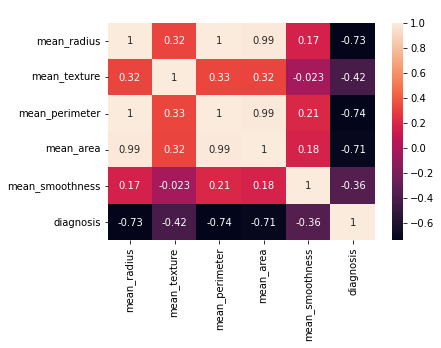

In [55]:
correlationMatrix(data)
plt.title('Heatmap with target', color='white')
plt.show()

In [6]:
# check for NA value in data
cols = data.columns
for c in cols:
  print(f'NA in {c}: {data[c].isna().any()}')

# no NA values present -- yay!

NA in mean_radius: False
NA in mean_texture: False
NA in mean_perimeter: False
NA in mean_area: False
NA in mean_smoothness: False
NA in diagnosis: False


In [7]:
target = data.pop('diagnosis')
cols_no_target = data.columns

In [8]:
target.value_counts()

1    357
0    212
Name: diagnosis, dtype: int64

In [9]:
target

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: diagnosis, Length: 569, dtype: int64

In [10]:
# normalize
data = pd.DataFrame(normalizer(data), columns=cols_no_target)

In [11]:
data

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
0,1.097064,-2.073335,1.269934,0.984375,1.568466
1,1.829821,-0.353632,1.685955,1.908708,-0.826962
2,1.579888,0.456187,1.566503,1.558884,0.942210
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553
4,1.750297,-1.151816,1.776573,1.826229,0.280372
...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842
565,1.704854,2.085134,1.615931,1.723842,0.102458
566,0.702284,2.045574,0.672676,0.577953,-0.840484
567,1.838341,2.336457,1.982524,1.735218,1.525767


In [12]:
# split the data into train val test
X, X_val, y, y_val = split_data(data, target)
X_train, X_test, y_train, y_test = split_data(X,y,test_size=0.1)

print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of X_val: {X_val.shape}')
print(f'Shape of X_test: {X_test.shape}')

Shape of X_train: (434, 5)
Shape of X_val: (86, 5)
Shape of X_test: (49, 5)


# Problem 1

## Deep Learning Model

In [224]:
def build_nn_model(num_classes):
  n_cols = X_train.shape[1]
  
  model = Sequential()
  model.add(L.Dense(3, activation='relu', input_shape=(n_cols,)))
  model.add(L.Dense(3, activation='relu'))
  model.add(L.Dense(3, activation='relu'))
  model.add(L.Dense(3, activation='relu'))
  model.add(L.Dense(1, 'sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

def Feed_Forward_NN(epochs=5):
  
  # Apply a feed-forward neural network along with hyper-parameter tuning for the same.
  model = build_nn_model(2)

  model_name_loss = model_dir +'best_v2.h5'
  chkpoint = ModelCheckpoint(filepath=model_name_loss, 
                              monitor='val_loss',
                              verbose=0, 
                              save_best_only=True,
                              mode='min')

  history_model = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_val,y_val), callbacks=chkpoint)
  
  return model, history_model

In [234]:
model_nn, history = Feed_Forward_NN(epochs=35)

Epoch 1/35
14/14 [==============================] - 2s 35ms/step - loss: 0.6944 - accuracy: 0.3618 - val_loss: 0.6923 - val_accuracy: 0.6395
Epoch 2/35
14/14 [==============================] - 0s 15ms/step - loss: 0.6909 - accuracy: 0.6244 - val_loss: 0.6888 - val_accuracy: 0.6395
Epoch 3/35
14/14 [==============================] - 0s 17ms/step - loss: 0.6884 - accuracy: 0.6244 - val_loss: 0.6864 - val_accuracy: 0.6395
Epoch 4/35
14/14 [==============================] - 0s 14ms/step - loss: 0.6864 - accuracy: 0.6244 - val_loss: 0.6841 - val_accuracy: 0.6395
Epoch 5/35
14/14 [==============================] - 0s 16ms/step - loss: 0.6842 - accuracy: 0.6244 - val_loss: 0.6812 - val_accuracy: 0.6395
Epoch 6/35
14/14 [==============================] - 0s 11ms/step - loss: 0.6814 - accuracy: 0.6244 - val_loss: 0.6778 - val_accuracy: 0.6395
Epoch 7/35
14/14 [==============================] - 0s 11ms/step - loss: 0.6780 - accuracy: 0.6244 - val_loss: 0.6736 - val_accuracy: 0.6395
Epoch 8/35
14

In [236]:
# load best model
model = build_nn_model(2)
model.load_weights(model_dir  + 'best_v2.h5')

In [242]:
y_pred_train = model.predict(X_train)
y_pred_train = y_pred_train > 0.5
print('Train Metrics -- NN')
metrics(y_train, y_pred_train)

y_pred_val = model.predict(X_val)
y_pred_val = y_pred_val > 0.5
print('Validation Metrics -- NN')
metrics(y_val, y_pred_val)

y_pred_test = model.predict(X_test)
y_pred_test = y_pred_test > 0.5
print('Test Metrics -- NN')
metrics(y_test, y_pred_test)

Train Metrics -- NN
F1 Score: 0.9347442680776015
Accuracy Score: 0.9147465437788018
Precision: 0.8952702702702703
Recall: 0.977859778597786
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.81      0.88       163
           1       0.90      0.98      0.93       271

    accuracy                           0.91       434
   macro avg       0.93      0.89      0.91       434
weighted avg       0.92      0.91      0.91       434


Validation Metrics -- NN
F1 Score: 0.9649122807017544
Accuracy Score: 0.9534883720930233
Precision: 0.9322033898305084
Recall: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.87      0.93        31
           1       0.93      1.00      0.96        55

    accuracy                           0.95        86
   macro avg       0.97      0.94      0.95        86
weighted avg       0.96      0.95      0.95        86


Test Metrics -- NN
F1 Sco

In [243]:
cm_nn = confusion_matrix(y_test, y_pred_test)
cm_nn

array([[15,  3],
       [ 0, 31]])

## Explainable Model -- DT

In [13]:
def DecisionTree():
    DT_model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=42).fit(X_train,y_train) # declare and fit
    y_train_pred_DT = DT_model.predict(X_train)
    y_val_pred_DT = DT_model.predict(X_val)
    y_test_pred_DT = DT_model.predict(X_test)
    return y_train_pred_DT, y_val_pred_DT, y_test_pred_DT, DT_model

In [15]:
y_train_pred_DT, y_val_pred_DT, y_test_pred_DT, DT_model = DecisionTree()
print('Train Metrics -- DT')
metrics(y_train, y_train_pred_DT)
print('Validation Metrics -- DT')
metrics(y_val, y_val_pred_DT)
print('Test Metrics -- DT')
metrics(y_test, y_test_pred_DT)

Train Metrics -- DT
F1 Score: 0.9892086330935251
Accuracy Score: 0.9861751152073732
Precision: 0.9927797833935018
Recall: 0.985663082437276
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       155
           1       0.99      0.99      0.99       279

    accuracy                           0.99       434
   macro avg       0.98      0.99      0.98       434
weighted avg       0.99      0.99      0.99       434


Validation Metrics -- DT
F1 Score: 0.8799999999999999
Accuracy Score: 0.8604651162790697
Precision: 0.8461538461538461
Recall: 0.9166666666666666
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.79      0.83        38
           1       0.85      0.92      0.88        48

    accuracy                           0.86        86
   macro avg       0.86      0.85      0.86        86
weighted avg       0.86      0.86      0.86        86


Test Metri

## Explainability -- DT

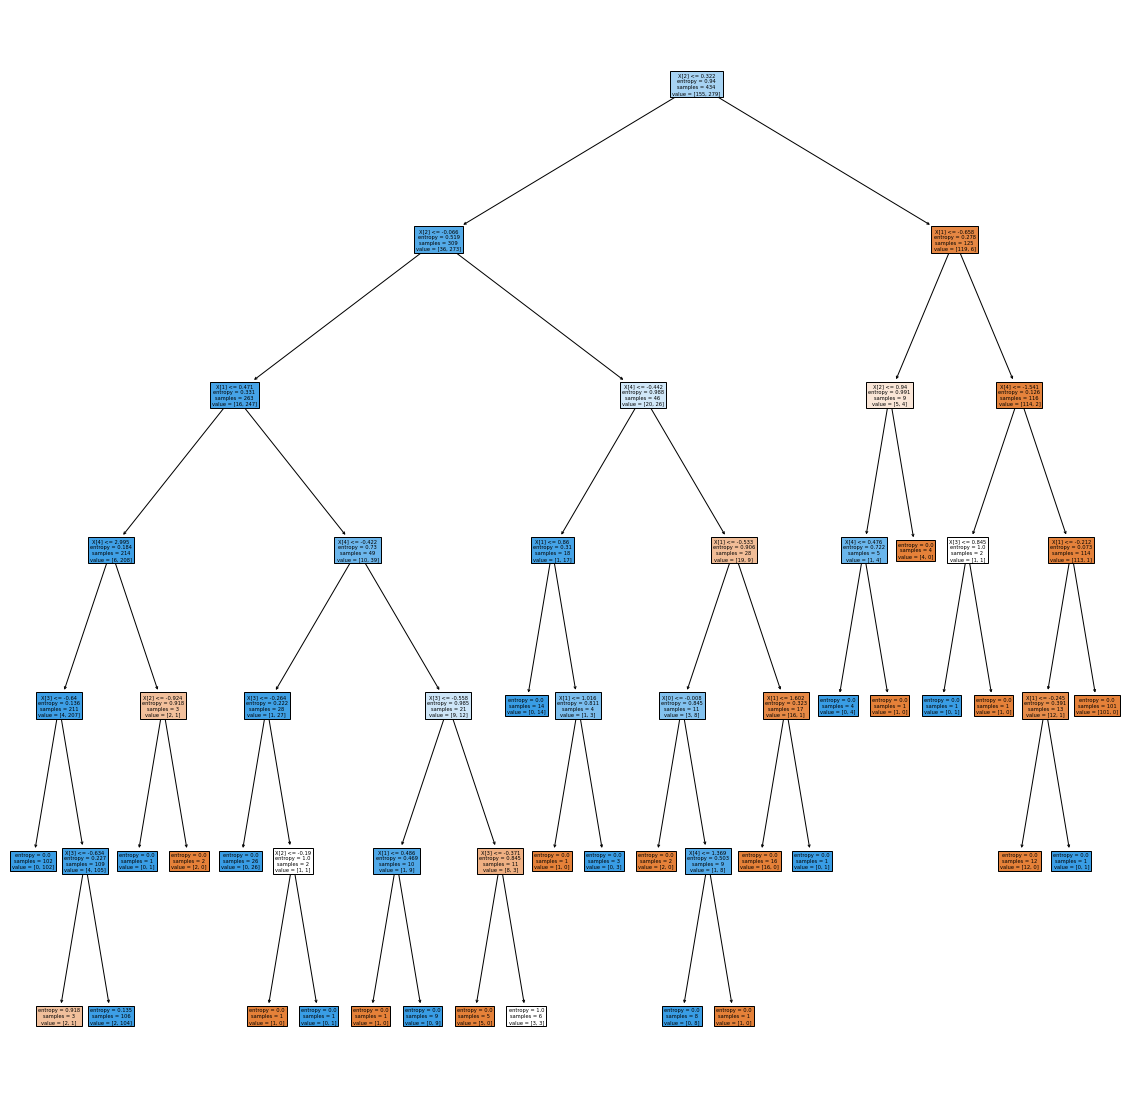

In [17]:
# print the tree graph out for visual representation
_, axs = plt.subplots(figsize=(20,20)) 
tree.plot_tree(DT_model, filled=True, ax=axs)
plt.show()

In [18]:
# Helper function to check if random number was already selected
def exists(arr, num):
    for a in arr:
        if a == num: return True
    return False

def ModelIntepretability(DT_model):
    # Input: Decision Tree Model 
    # Output: An explanation based on the decision tree model for 3-4 randomly selected positive and negative examples.

    # store the key features, thresholds and ids of left and right children from the DT model
    thresholds = DT_model.tree_.threshold
    features = DT_model.tree_.feature
    left_children = DT_model.tree_.children_left
    right_children = DT_model.tree_.children_right
    
    # store the column names to be used in the description of the decisions
    col_names = X_test.columns.values

    # get positive and negative dataframes to guarantee a postive and negative sample selection
    pos_val = X_test[y_test == 1]
    neg_val = X_test[y_test == 0]

    # get the index values of the samples so properly index the arrays with random indexes
    pos_idxs = pos_val.index.values
    neg_idxs = neg_val.index.values
    
    sample_idxs = []
    # get 5 samples of class '1' and 5 samples of class '0'
    for i in range(10):
        if i <= 4: # 5 positive samples
            num = pos_idxs[random.randrange(0,len(pos_idxs))] # random number between 0 and the length of the indices, which is used as the index for positive indices
            while exists(sample_idxs, num) : num = pos_idxs[random.randrange(0,len(pos_idxs))] # if the number has already been chosen, chose another random number
            sample_idxs.append(num) # append after finding a number that hasnt already been chosen
        else: #  and 5 negative samples
            num = neg_idxs[random.randrange(0,len(neg_idxs))] 
            while exists(sample_idxs, num) : num = neg_idxs[random.randrange(0,len(neg_idxs))]
            sample_idxs.append(num) # store randomly chosen negative indices
    
    for i,s_idx in enumerate(sample_idxs):
        sample = np.array(X_test[X_test.index.values == s_idx]).reshape(1,-1) # using the random indices, get the sample of each index
        path = DT_model.decision_path(sample) # call the decision_path function which returns the path that was taken to get to the end result
        node_ids = path.indices # get the actual node ids of the path taken
        print(f'Path for predicting sample {i} with dataframe index {s_idx}')
        path_len = len(node_ids)
        # Describe the path
        for j, step in enumerate(node_ids):
            if j < path_len - 1: # if not leaf node
                value = sample[0][features[step]] # feature value to split on
                if value > thresholds[step]: direction = 'right' # decision to go left or right down the tree
                else: direction = 'left'
                # print the result for this decision
                print(f'Decision at node {node_ids[j]}: split on {col_names[features[step]]} with threshold {thresholds[step]: .3f}. The feature value at this split is {value: .3f}, so the {direction} path is taken.')
            else:
                ground_truth = y_test[y_test.index.values == s_idx].values[0]
                pred = DT_model.predict(sample)[0]
                if ground_truth == pred: correct = ' correct'
                else: correct = 'n incorrect'
                print(f'Leaf node reached! The DT predicted {pred} and the true value was {ground_truth} so it was a{correct} prediction!')
        print()
    return sample_idxs

random_samples_ids = ModelIntepretability(DT_model)

Path for predicting sample 0 with dataframe index 467
Decision at node 0: split on mean_perimeter with threshold  0.322. The feature value at this split is -1.273, so the left path is taken.
Decision at node 1: split on mean_perimeter with threshold -0.066. The feature value at this split is -1.273, so the left path is taken.
Decision at node 2: split on mean_texture with threshold  0.471. The feature value at this split is -0.277, so the left path is taken.
Decision at node 3: split on mean_smoothness with threshold  2.995. The feature value at this split is -0.943, so the left path is taken.
Decision at node 4: split on mean_area with threshold -0.640. The feature value at this split is -1.048, so the left path is taken.
Leaf node reached! The DT predicted 1 and the true value was 1 so it was a correct prediction!

Path for predicting sample 1 with dataframe index 59
Decision at node 0: split on mean_perimeter with threshold  0.322. The feature value at this split is -1.550, so the l

#Problem 2

## Baseline RF Classifier

In [19]:
# Random Forest
def RF(depth=7, estimators=10, min_samples_split=3, seed=0):
    model = RandomForest(max_depth=depth, min_samples_split=min_samples_split, random_state=seed, n_estimators=estimators, criterion='entropy').fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    return y_train_pred, y_val_pred, model

In [20]:
'''
Random Forest Metrics
'''
y_train_pred, y_val_pred, model_RF = RF(depth=10, estimators=25, min_samples_split=3, seed=42)
print('Train Metrics:')
metrics(y_train, y_train_pred)
print('\nValidation Metrics:')
metrics(y_val, y_val_pred)
print('\nTest Metrics:')
y_test_pred = model_RF.predict(X_test)
metrics(y_test, y_test_pred)

print('Confusion Matrix for RF Test Set')
cm_rf = confusion_matrix(y_test, y_test_pred)
cm_rf

Train Metrics:
F1 Score: 0.9946524064171123
Accuracy Score: 0.9930875576036866
Precision: 0.9893617021276596
Recall: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       155
           1       0.99      1.00      0.99       279

    accuracy                           0.99       434
   macro avg       0.99      0.99      0.99       434
weighted avg       0.99      0.99      0.99       434



Validation Metrics:
F1 Score: 0.9038461538461539
Accuracy Score: 0.8837209302325582
Precision: 0.8392857142857143
Recall: 0.9791666666666666
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.76      0.85        38
           1       0.84      0.98      0.90        48

    accuracy                           0.88        86
   macro avg       0.90      0.87      0.88        86
weighted avg       0.90      0.88      0.88        86



Test Metrics:
F1 Score: 0.933333

array([[17,  2],
       [ 2, 28]])

## Explainability -- RF

Use one of the DTs in the random forest that best fits with the prediction and use it to explain the prediction.

In [21]:
random_samples_ids

[467, 59, 299, 276, 133, 280, 321, 498, 86, 7]

In [28]:
def get_best_tree_index(RF_model):
  best_idx = 0
  best_acc = 0.0

  for i, dt in enumerate(RF_model.estimators_):
    y_pred_test = dt.predict(X_test)
    acc = accuracy_score(y_test, y_pred_test)
    #print(f'accuacy of tree {i}, is: {acc}')
    if acc > best_acc:
      best_acc = acc
      best_idx = i
  return best_idx

In [26]:
#search for highest accuracy
get_best_tree_index(model_RF)

accuacy of tree 0, is: 0.8775510204081632
accuacy of tree 1, is: 0.9183673469387755
accuacy of tree 2, is: 0.8979591836734694
accuacy of tree 3, is: 0.9591836734693877
accuacy of tree 4, is: 0.9591836734693877
accuacy of tree 5, is: 0.8775510204081632
accuacy of tree 6, is: 0.8979591836734694
accuacy of tree 7, is: 0.9183673469387755
accuacy of tree 8, is: 0.9183673469387755
accuacy of tree 9, is: 0.9387755102040817
accuacy of tree 10, is: 0.9183673469387755
accuacy of tree 11, is: 0.9387755102040817
accuacy of tree 12, is: 0.8979591836734694
accuacy of tree 13, is: 0.9387755102040817
accuacy of tree 14, is: 0.9183673469387755
accuacy of tree 15, is: 0.8775510204081632
accuacy of tree 16, is: 0.8979591836734694
accuacy of tree 17, is: 0.9591836734693877
accuacy of tree 18, is: 0.9183673469387755
accuacy of tree 19, is: 0.9387755102040817
accuacy of tree 20, is: 0.9183673469387755
accuacy of tree 21, is: 0.9183673469387755
accuacy of tree 22, is: 0.8775510204081632
accuacy of tree 23, i

3

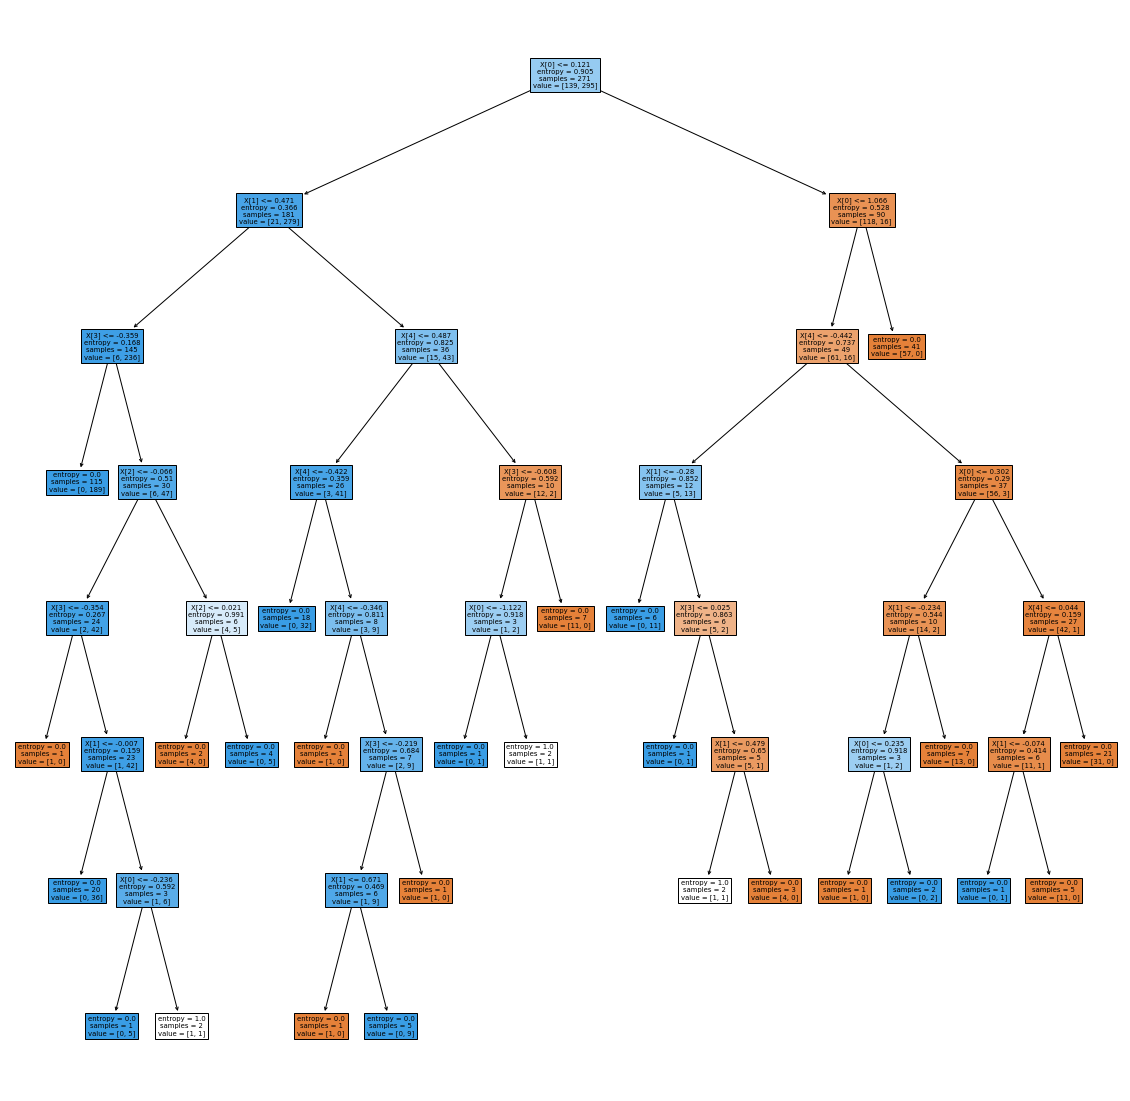

Path for predicting sample 0 with dataframe index 467
Decision at node 0: split on mean_radius with threshold  0.121. The feature value at this split is -1.267, so the left path is taken.
Decision at node 1: split on mean_texture with threshold  0.471. The feature value at this split is -0.277, so the left path is taken.
Decision at node 2: split on mean_area with threshold -0.359. The feature value at this split is -1.048, so the left path is taken.
Leaf node reached! The DT predicted 1 and the true value was 1 so it was a correct prediction!

Path for predicting sample 1 with dataframe index 59
Decision at node 0: split on mean_radius with threshold  0.121. The feature value at this split is -1.565, so the left path is taken.
Decision at node 1: split on mean_texture with threshold  0.471. The feature value at this split is -1.745, so the left path is taken.
Decision at node 2: split on mean_area with threshold -0.359. The feature value at this split is -1.224, so the left path is ta

In [37]:
# samples and labels
samples = X_test.loc[random_samples_ids]
labels = y_test.loc[random_samples_ids]

# find DT that best fits prediction
best_dt_idx = get_best_tree_index(model_RF)
# chosen decision tree
chosen_one = model_RF.estimators_[best_dt_idx]

# print the tree graph out for visual representation
_, axs = plt.subplots(figsize=(20,20)) 
tree.plot_tree(chosen_one, filled=True, ax=axs)
plt.show()

# store the key features, thresholds and ids of left and right children from the DT model
thresholds = chosen_one.tree_.threshold
features = chosen_one.tree_.feature
left_children = chosen_one.tree_.children_left
right_children = chosen_one.tree_.children_right
# store col_names to use in path explanation
col_names = X_test.columns.values


# iterate the samples
for i, lbl in enumerate(labels):
  # grab sample
  sample = np.array(samples.iloc[i]).reshape(1,-1)

  '''explain sample with path'''
  path = chosen_one.decision_path(sample) # call the decision_path function which returns the path that was taken to get to the end result
  node_ids = path.indices # get the actual node ids of the path taken
  print(f'Path for predicting sample {i} with dataframe index {random_samples_ids[i]}')
  path_len = len(node_ids)
  # Describe the path
  for j, step in enumerate(node_ids):
      if j < path_len - 1: # if not leaf node
          value = sample[0][features[step]] # feature value to split on
          if value > thresholds[step]: direction = 'right' # decision to go left or right down the tree
          else: direction = 'left'
          # print the result for this decision
          print(f'Decision at node {node_ids[j]}: split on {col_names[features[step]]} with threshold {thresholds[step]: .3f}. The feature value at this split is {value: .3f}, so the {direction} path is taken.')
      else:
          ground_truth = y_test[y_test.index.values == random_samples_ids[i]].values[0]
          pred = DT_model.predict(sample)[0]
          if ground_truth == pred: correct = ' correct'
          else: correct = 'n incorrect'
          print(f'Leaf node reached! The DT predicted {pred} and the true value was {ground_truth} so it was a{correct} prediction!')
  print()

# Problem 3

In [38]:
# get feature importances
feature_importance = pd.DataFrame({'feature' : X_train.columns, 'importance' : np.round(model_RF.feature_importances_,4)})
feature_importance = feature_importance.sort_values('importance',ascending=False).set_index('feature')

In [39]:
# show feature importances
feature_importance.head(5)

,importance
feature,
mean_perimeter,0.3171
mean_radius,0.2159
mean_area,0.1932
mean_texture,0.1478
mean_smoothness,0.1260


In [59]:
samples['diagnosis'] = labels
samples

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
467,-1.266502,-0.276839,-1.273149,-1.048305,-0.942962,1
59,-1.564717,-1.745219,-1.549947,-1.224071,0.082532,1
299,-1.027362,0.884367,-1.034658,-0.912073,0.365770,1
276,-0.794471,-1.193704,-0.831178,-0.734601,-0.182915,1
133,0.449512,-1.247226,0.413178,0.303781,-0.123848,1
280,1.429361,1.701168,1.409980,1.374017,0.401353,0
321,1.713375,0.086183,1.611812,1.760815,-1.150054,0
498,1.239071,-0.411809,1.208148,1.174930,0.344421,0
86,0.100174,0.505055,0.093953,-0.019024,-0.136658,0
7,-0.118517,0.358450,-0.072867,-0.218965,1.604049,0


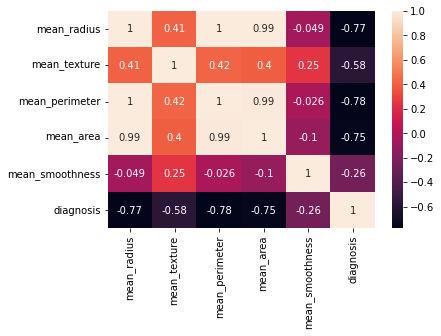

In [60]:
'''Use correlationMatrix method defined above to get feautre correlations for the samples analyzed'''
correlationMatrix(samples)